In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
prescriptions2014 = pd.read_csv('data2/Prescribing_Rate_2014.csv')
prescriptions2015 = pd.read_csv('data2/Prescribing_Rate_2015.csv')
prescriptions2016 = pd.read_csv('data2/Prescribing_Rate_2016.csv')
prescriptions2017 = pd.read_csv('data2/Prescribing_Rate_2017.csv')

In [3]:
allprescriptions = pd.concat([prescriptions2014, prescriptions2015, prescriptions2016, prescriptions2017])
allprescriptions.head()

,Year,State,State ABBR,Prescribing Rate
0,2014,Alabama,AL,135.2
1,2014,Alaska,AK,62.7
2,2014,Arizona,AZ,79.7
3,2014,Arkansas,AR,123.2
4,2014,California,CA,52.7


In [4]:
allprescriptions.to_csv('prescriptions.csv')

In [5]:
death_count = pd.read_csv('data2/Drug_Overdose_Mortality_deaths.csv')
death_count.head()

,STATE,STATE_ABBR,2014,2015,2016,2017,Unnamed: 6
0,Alabama,AL,723,736,756,835,NaN
1,Alaska,AK,124,122,128,147,NaN
2,Arizona,AZ,"1,211","1,274","1,382","1,532",NaN
3,Arkansas,AR,356,392,401,446,NaN
4,California,CA,"4,521","4,659","4,654","4,868",NaN


In [6]:
death_ct = death_count.drop(['Unnamed: 6'], axis=1)
death_ct.head()

,STATE,STATE_ABBR,2014,2015,2016,2017
0,Alabama,AL,723,736,756,835
1,Alaska,AK,124,122,128,147
2,Arizona,AZ,"1,211","1,274","1,382","1,532"
3,Arkansas,AR,356,392,401,446
4,California,CA,"4,521","4,659","4,654","4,868"


In [7]:
death_counts = death_ct.dropna()
death_counts.head(2)

,STATE,STATE_ABBR,2014,2015,2016,2017
0,Alabama,AL,723,736,756,835
1,Alaska,AK,124,122,128,147


In [8]:
death_rate = pd.read_csv('data2/Drug_Overdose_Mortality_Rate.csv')
death_rate.head()

,STATE,STATE_ABBR,2014,2015,2016,2017
0,Alabama,AL,15.2,15.7,16.2,18.0
1,Alaska,AK,16.8,16.0,16.8,20.2
2,Arizona,AZ,12.6,19.0,20.3,22.2
3,Arkansas,AR,18.2,13.8,14.0,15.5
4,California,CA,11.1,11.3,11.2,11.7


In [9]:
deaths_rate = death_rate.dropna()
deaths_rate.head(2)

,STATE,STATE_ABBR,2014,2015,2016,2017
0,Alabama,AL,15.2,15.7,16.2,18.0
1,Alaska,AK,16.8,16.0,16.8,20.2


In [10]:
national_deaths = pd.read_csv('data2/Death_Comparison.csv')
national_deaths

,Year,Male,Female,All_Drugs_Overdose,Opioids_Overdose
0,2014,"18,420","10,227",47055,"28,647"
1,2015,"21,671","11,420",52404,"33,091"
2,2016,"28,498","13,751","63,632","42,249"
3,2017,"32,337","15,263",70237,"47,600"


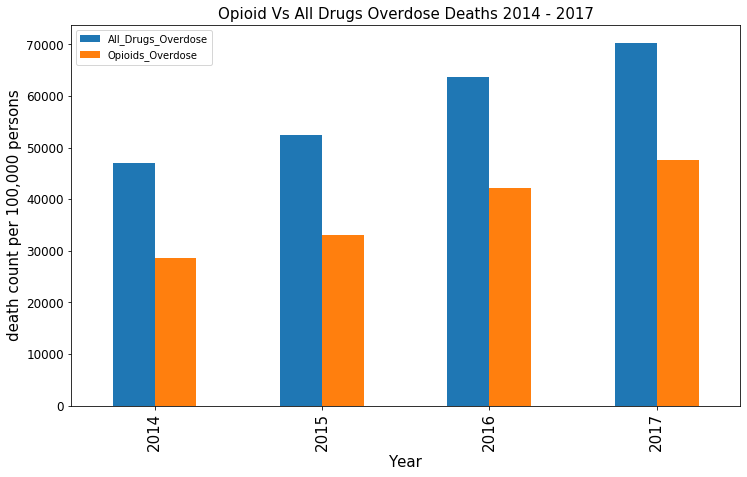

In [11]:
national_deaths = pd.DataFrame({"Year": [2014,2015,2016,2017],
                   "All_Drugs_Overdose" : [47055,52404,63632,70237],
                   "Opioids_Overdose" : [28647,33091,42249,47600] })
#color_dict ={'All_Drugs_Overdose': 'crimson'}
national_deaths.plot(x="Year", y=["All_Drugs_Overdose", "Opioids_Overdose"], kind="bar", figsize=(12,7))
plt.xlabel('Year', fontsize=15)
plt.ylabel('death count per 100,000 persons', fontsize=15)
plt.title('Opioid Vs All Drugs Overdose Deaths 2014 - 2017', fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 12)
#plt.savefig("Overdose_Trends")
plt.show()

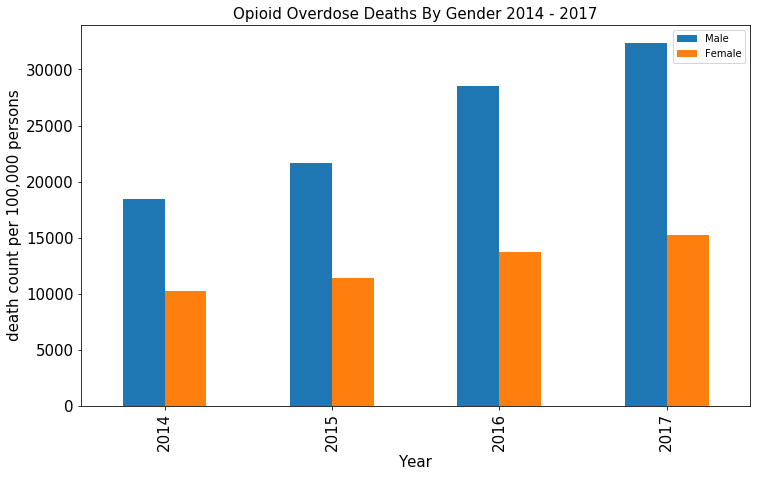

In [12]:
national_deaths = pd.DataFrame({"Year": [2014,2015,2016,2017],
                   "Male" : [18420,21671,28498,32337],
                   "Female" : [10227,11420,13751,15263]})
national_deaths.plot(x="Year", y=["Male", "Female"], kind="bar", figsize=(12,7))
plt.xlabel('Year', fontsize=15)
plt.ylabel('death count per 100,000 persons', fontsize=15)
plt.title('Opioid Overdose Deaths By Gender 2014 - 2017', fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.savefig("Gender_Trends")
plt.show()

In [13]:
presc_deaths = pd.read_csv('data2/DP_Rates.csv')
presc_deaths

,Year,Death_Rate,Prescribing_Rate
0,2014,9.0,75.6
1,2015,10.4,70.6
2,2016,13.3,66.5
3,2017,14.9,58.7


In [14]:
states_deaths = pd.read_csv('data2/Deaths_Only.csv')
states_deaths.head(2)

,State,Year,Total_Deaths
0,Alabama,2014,270
1,Alaska,2014,76


In [15]:
total_deaths = states_deaths.groupby('State').sum()
total_deaths.head()

,Year,Total_Deaths
State,,
Alabama,8062,1317
Alaska,8062,358
Arizona,8062,2957
Arkansas,8062,733
California,8062,8253


In [16]:
#top20 = states_deaths.sort_values(by='Total_Deaths', ascending=False)
top20 = total_deaths.nlargest(20, ['Total_Deaths'])
top20

,Year,Total_Deaths
State,,
Ohio,8062,12710
New York,8062,10138
Florida,8062,9280
California,8062,8253
Pennsylvania,8062,7237
Illinois,8062,6735
Massachusetts,8062,6593
Michigan,8062,6156
Maryland,8062,5814


<function matplotlib.pyplot.show(*args, **kw)>

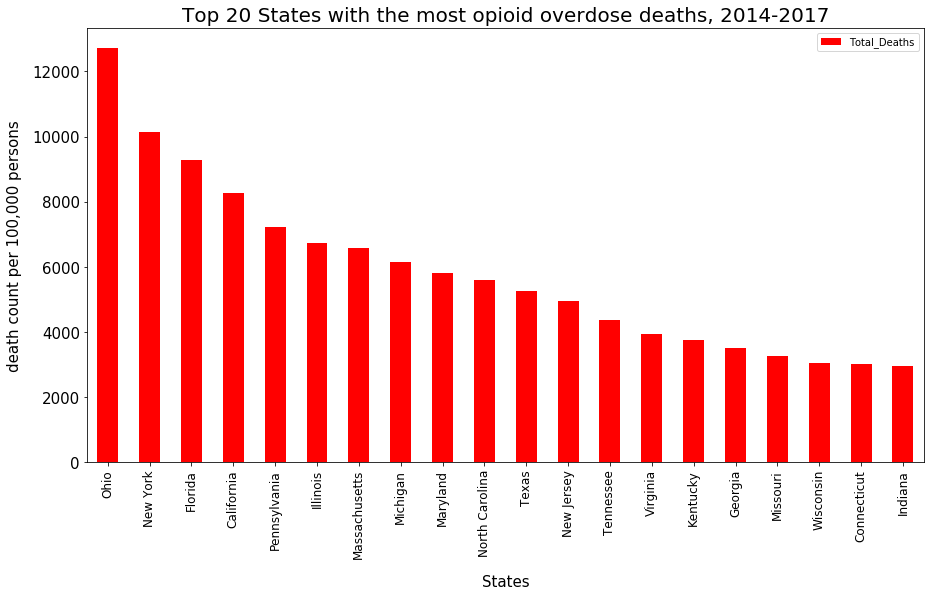

In [17]:
top20.plot(y="Total_Deaths", kind='bar', figsize=(15,8), color='red')

plt.xlabel('States', fontsize=15, labelpad=16)
plt.ylabel('death count per 100,000 persons', fontsize=15, labelpad=10)
plt.title('Top 20 States with the most opioid overdose deaths, 2014-2017', fontsize=20)
plt.xticks(size = 12)
plt.yticks(size = 15)
#plt.savefig("top_states")
plt.show

In [18]:
synthetics = pd.read_csv('data2/Copy_Synthetic_Opioids.csv')
synthetics

,Year,Total_Overdose_Deaths,Any_Opioid,Prescription_Opioids,Fentanyl,Heroin
0,2014,47055,"28,647",14838,"5,544","10,574"
1,2015,52404,"33,091",15281,"9,580","12,989"
2,2016,"63,632","42,249",17087,"19,413","15,469"
3,2017,70237,"47,600",17029,"28,466","15,482"


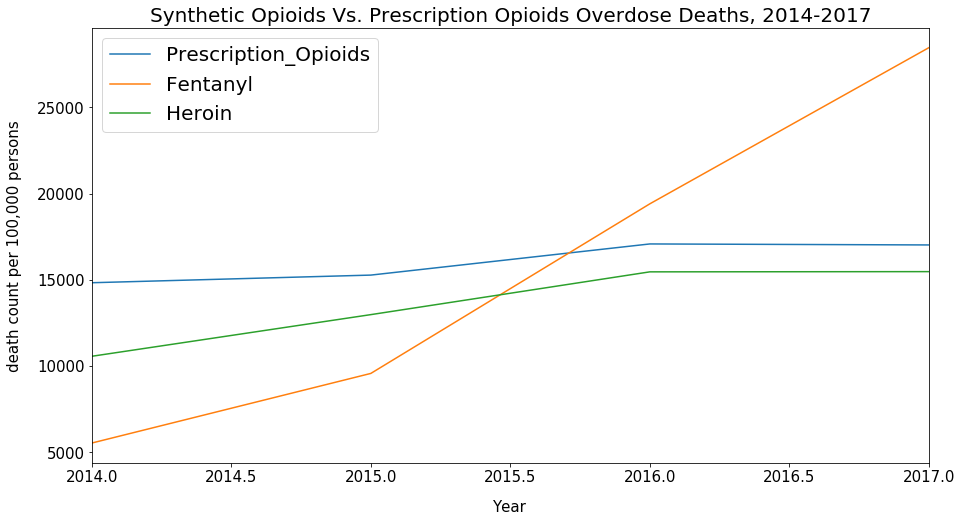

In [19]:
synthetics = pd.DataFrame({'Prescription_Opioids': [14838, 15281, 17087, 17029],
                           'Fentanyl': [5544, 9580, 19413, 28466],
                           'Heroin': [10574, 12989, 15469, 15482]}, 
                          index=[2014, 2015, 2016, 2017])

synthetics.plot.line(figsize=(15,8))
                          
plt.xlabel('Year', fontsize=15, labelpad=15)
plt.ylabel('death count per 100,000 persons', fontsize=15, labelpad=15)
plt.title('Synthetic Opioids Vs. Prescription Opioids Overdose Deaths, 2014-2017', fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc=2, prop={'size': 20})


#plt.savefig("Synthetic Opioids")